In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm

import random
from math import sin, cos, sqrt, atan2, radians
from ease_grid import EASE2_grid
grid_size = 36000
egrid = EASE2_grid(grid_size)
import time
from impacts import distance, IMPAaCS

# Simple test case forcing impacts at single location

In [15]:
### This is only a test. Forcing impacts at one location to test the dynamics
print("This is only a test. Forcing impacts at one location to test the dynamics")
I = IMPAaCS(egrid, test_layers=1, z_discretized_km=int(2), bound_sio2=True, consider_impact_angle=[3,3])
#I.__init__(egrid)

impact_test_diameters = [330, 73, 16]

for sim_time, impactor_diameter in enumerate(impact_test_diameters):

    impact_lat = 0.18672199                             # Test scenario
    impact_lon = 0.14122179                            # Test scenario
    impact_loc = [impact_lat, impact_lon]            # Test scenario
                
    #####      DO THE DYANMICS       #############################
    I.update(impact_loc, impactor_diameter, sim_time)
    
    print("Average target", I.average_target)
    
    print("impact_angle_factor", I.impact_angle_factor)

    print('{} diameter IMPAaC at Test cell: {}'.format(impactor_diameter, 
                                                       I.impact_test_id))
    print('average_target: {}, across {} grid cells'.format(np.round(I.average_target,1), 
                                                    len(I.impacted_grid_cells)))
    print("SiO2 states at test grid:")
    print(list(I.grid_cell_state[I.impact_test_id])[0:165])
    print(" ")


This is only a test. Forcing impacts at one location to test the dynamics
Average target 45.0
impact_angle_factor 3.0
330 diameter IMPAaC at Test cell: 0.1867 0.1412
average_target: 45.0, across 6516 grid cells
SiO2 states at test grid:
[49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 49.4, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 

In [16]:
print("top_layers_at_test_cell", I.top_layers_at_test_cell)

top_layers_at_test_cell [45, 49.4, 54.2, 59.5]


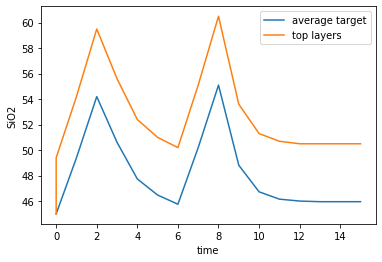

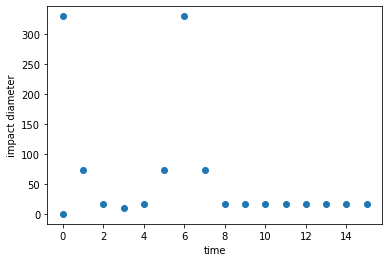

In [14]:
plt.plot(I.test_time, I.average_test_target_list)
plt.plot(I.test_time, I.top_layers_at_test_cell)
plt.legend(["average target", "top layers"])
plt.xlabel("time")
plt.ylabel("SiO2")
plt.show()
plt.close()
plt.scatter(I.test_time, I.impactors_at_test_cell)
plt.ylabel("impact diameter")
plt.xlabel("time")
plt.show()
plt.close()

# Now generate some Random synthetic data and run a 500Ma simulation

In [ ]:
# Set the size bins
max_diameter=330

diam_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500]
diam_labs = [f'{str(i).zfill(3)}-{str(j).zfill(3)}' for i, j in zip(diam_bins[0:-1], diam_bins[1:])]
diam_range = {f'{str(i).zfill(3)}-{str(j).zfill(3)}':[i,j] for i, j in zip(diam_bins[0:-1], diam_bins[1:])}
lambda_start = {j:1+i/10 for i, j in enumerate(list(diam_range.keys()))}
lambda_end = {j:1+(np.power(i,1.03)) for i, j in enumerate(list(diam_range.keys()))}    

In [ ]:
# Make dictionary with size bins and frequency
with open('sfd.csv', 'r') as f:
    freqs = pd.read_csv(f).groupby('D').sum()
los_dict = {i:0 for i in diam_labs}
his_dict = {i:0 for i in diam_labs}
for i in freqs.index.values:
    for j in range(len(diam_labs)):
        if i < diam_bins[j+1] and i > 9:
            los_dict[diam_labs[j]] += freqs.loc[i,'low']
            his_dict[diam_labs[j]] += freqs.loc[i,'high']
            break
        elif i >= diam_bins[-1]:
            los_dict[diam_labs[-1]] += freqs.loc[i,'low']
            his_dict[diam_labs[-1]] += freqs.loc[i,'high']
            break
df_freq = pd.DataFrame.from_dict({'high':his_dict, 'low':los_dict, 
                                  'lambda_start':lambda_start, 'lambda_end':lambda_end})

df_freq['frequency_factor'] = [.1+i/10 for i in range(len(diam_bins)-1)]

df_freq

In [ ]:
# A Hack to force a lot of smaller impacters
df_freq.loc["010-020","low"] = 110000
#df_freq.loc["010-020","lambda_end"] = 1

In [ ]:
t_total=500

fivehundredmillion = 500000000
freq_factor = fivehundredmillion/t_total

not_converged=True
while not_converged:

    pp = {x:np.zeros(t_total) for x in diam_labs}
    l = {x:np.linspace(y,z,t_total) for x,y,z in zip(diam_labs,df_freq['lambda_start'],df_freq['lambda_end'])}

    for D in diam_labs:
        pp[D] = l[D]*np.exp(-l[D])

    df = pd.DataFrame(data=pp)
    hits = {d:np.zeros(t_total) for d in diam_labs}

    # Main loop through time. Calculate the total number of impacts of each diameter at each time step
    for t in range(0,t_total):
        for D in diam_labs:
            hits[D][t] = np.floor(np.random.poisson(pp[D][t] / df_freq.loc[D, 'frequency_factor']))


    total_sum = np.sum([hits[d] for d in diam_labs])
    sums = {d:np.sum(hits[d]) for d in diam_labs}
    frac = {d:np.round(np.sum(hits[d])/total_sum,2) for d in diam_labs}
    
    for d in diam_labs:
        df_freq.loc[d,'total']=sums[d]
    
    good_numbers = 0
    for d in diam_labs:
        if df_freq.loc[d,'total'] < df_freq.loc[d,'low']:
            df_freq.loc[d,'frequency_factor'] = df_freq.loc[d,'frequency_factor']*random.random()
        elif df_freq.loc[d,'total'] > df_freq.loc[d,'high']:
            df_freq.loc[d,'frequency_factor'] = df_freq.loc[d,'frequency_factor']*(1+random.random())
        else:
            good_numbers+=1
    if good_numbers == df_freq.shape[0]:
        not_converged = False
    
    
    
plt.plot(df)
plt.legend(df.columns.values)
plt.show()
print('total impacts', total_sum)
print('impacts by diameter', sums)
print('fraction of total', frac)
plot_time = np.linspace(0,fivehundredmillion,t_total+1)[1:]
df = pd.DataFrame(data=hits, index=plot_time)
df.plot(subplots=True)
plt.tight_layout()
plt.show()
df_freq

In [ ]:
# Create a list of timesteps to make plots.
list_impacts_export = list(range(0,500,50))
list_impacts_export.append(499)

In [ ]:
# Set up the simulation scenario
impact_boundz=5
[-impact_boundz, impact_boundz]
Impc = IMPAaCS(egrid, max_depth_of_impact_melt=330, 
               lon_lims = [-impact_boundz, impact_boundz], lat_lims = [-impact_boundz, impact_boundz],
               bound_sio2=True)

In [ ]:
# Make the calculations to plot the raltive percent crustal volume
# (grid_size [m] / 1000 [km/m])^2 [km^2] * Impc.z_discretized_km [km]
grid_area = np.power(grid_size/1000,2)
cube_volume = grid_area * Impc.z_discretized_km
print(f"cube volume {cube_volume}, in km^3")

# Get our surface are in proportion to Earth surface area
# grid area [km^2] * n_grids in row * n_grid in col
n_cubes_per_layer = Impc.n_x * Impc.n_y
sample_area = grid_area * n_cubes_per_layer
print(f"sample area {sample_area}, in km^2")
surface_area_of_earth = 507637669.626 #km^2
sample_area_ratio = sample_area / surface_area_of_earth
print(f"our sample represents {np.round(sample_area_ratio,3)} of earth's surface area")
surface_area_multiplier = 1/sample_area_ratio
print(f"we need to multiply our volume by {np.round(surface_area_multiplier,3)} to correct for sample/earth area")

cube_volume_multiplier = cube_volume * surface_area_multiplier
print(f"multiply n_cubes by {np.round(cube_volume_multiplier,1)} to get crust volume [km^3] on earth")

total_current_crust = 7.2e9 #km^3
print(f"divide by {total_current_crust} to get relative percent crust volume")

relative_percent_crust_vol_multiplier = cube_volume_multiplier / total_current_crust
print(f"the final multiplier to get relative percent volume crust is {relative_percent_crust_vol_multiplier}")

# Track the total volume of continental crust.
#volume_crust = {i:0 for i in range(10)}
n_cubes_above_60_list = []
relative_percent_crust_vol_list = []

In [ ]:
# Reversing the diameter labels to have the larger impacts hit first.
diam_labs.reverse()
diam_labs

In [ ]:
# Now run the simulation, and print/plot some stuff.
impactor_diameters = []
# Loop through impacts, the df has them stored by time and diameter bn
for it, t in enumerate(df.index.values):
    start_time = time.time()
    for d in diam_labs:
        for i in range(int(df.loc[t,d])):
            
            # locate the the impacts on earth
            impact_lat = random.randrange(-90,90)
            impact_lon = random.randrange(-180,180)
            if np.abs(impact_lat) > impact_boundz:
                continue
            if np.abs(impact_lon) > impact_boundz:
                continue
            impact_loc = [impact_lat, impact_lon]

            impactor_diameter = random.randrange(diam_range[d][0],diam_range[d][1])
            impactor_diameters.append(impactor_diameter)
            
            #####      DO THE DYANMICS       #############################
            Impc.update(impact_loc, impactor_diameter, t)
            
    # Fake a single hit at the test spot, just in case. Can delete this...
    impactor_diameter=10
    impactor_diameters.append(impactor_diameter)
    I.update([0.18672199, 0.14122179],impactor_diameter,t)
    
    #layer_perc_vol = 0
    Impc.do_volume_by_layer(10) # The defauld n_layers is 1, so acting on layer 0

    count_cubes=True
    if count_cubes:
        n_cubes_above_60 = 0
        for i in range(10):
    #         print(Impc.sum_at_sio2_by_layer[i])
            for sio2_bin in list(Impc.sum_at_sio2_by_layer[i].keys()):
                if sio2_bin >= 60:
                    n_cubes_above_60 += Impc.sum_at_sio2_by_layer[i][sio2_bin]
        n_cubes_above_60_list.append(n_cubes_above_60)
        relative_percent_crust_vol_list.append(n_cubes_above_60 * relative_percent_crust_vol_multiplier)

    if it == 0:
        percent_df = pd.DataFrame(Impc.percent_volume_by_layer[0], index=[it])
    else:
        percent_df = percent_df.append(Impc.percent_volume_by_layer[0], ignore_index=True)
            
    # make a map of the results at this time
    if it in list_impacts_export:
        Impc.plot_map_and_bar(plot_figure=True, save_figure=False,
                              map_layers=[0,1,2], dist_layer=0)

        print(impactor_diameters)
        print("test cell")
        print(Impc.grid_cell_state[I.impact_test_id])
        print("Number of impactors this time step", len(impactor_diameters))
        print("the average impactor diameter is", np.mean(np.array(impactor_diameters)))
        print("the minimum impactor diameter is", np.min(np.array(impactor_diameters)))
        print("the maximum impactor diameter is", np.max(np.array(impactor_diameters)))
        impactor_diameters = []
        
        print(percent_df.iloc[-1,:])

In [ ]:
plt.plot(np.array(relative_percent_crust_vol_list))
plt.xlabel("Time (Ga)")
plt.ylabel("Relative % continental crust volume")

In [ ]:
plt.plot(Impc.test_time, Impc.average_test_target_list)
plt.plot(Impc.test_time, Impc.top_layers_at_test_cell)
plt.legend(["average target", "top layer, single cell"])
plt.xlabel("time")
plt.ylabel("SiO2")
plt.show()
plt.close()
plt.scatter(Impc.test_time, Impc.impactors_at_test_cell)
plt.ylabel("impact diameter")
plt.xlabel("time")
plt.show()
plt.close()

# 10 X impacts teste cast

In [ ]:
### This is only a test. I am forcing impacts at one location to test the dynamics
### This is only a test. I am forcing impacts at one location to test the dynamics
### This is only a test. I am forcing impacts at one location to test the dynamics
print("This is only a test. I am forcing impacts at one location to test the dynamics")
print("This is only a test. I am forcing impacts at one location to test the dynamics")
I = IMPAaCS(egrid, bound_sio2=True)
I.__init__(egrid)
impact_test_diameters = [330, 330, 330, 330, 330, 330, 330, 330, 330, 330,
                         73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
                         16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 
                         10, 10,  10,  10,  10,  10,  10,  10,  10,  10, 
                         5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                         2, 2, 2, 2, 2, 2, 2, 2, 2, 2,]
# Loop through impacts, the df has them stored by time and diameter bn
for it, t in enumerate(df.index.values):
    print('time', it)
    for d in diam_labs[3:]:
        for i in range(int(df.loc[t,d])):

            # locate the the impacts on earth
            impact_lat = random.randrange(-90,90)
            impact_lon = random.randrange(-180,180)
            impact_loc = [impact_lat, impact_lon]

            # Specify the diameter within the bin
            if it < len(impact_test_diameters):                  # Test scenario
                impactor_diameter = impact_test_diameters[it]    # Test scenario
                impact_lat = 0.18672199                             # Test scenario
                impact_lon = 0.14122179                            # Test scenario
                impact_loc = [impact_lat, impact_lon]            # Test scenario
            else:                                                # Test scenario
                impactor_diameter = random.randrange(diam_range[d][0],diam_range[d][1])
                
            #####      DO THE DYANMICS       #############################
            I.update(impact_loc, impactor_diameter, t)

            break  # Test scenario

        if it < len(impact_test_diameters):   # Test scenario
            print("This is only a test. I am forcing impacts at one location to test the dynamics")
            print('{} diameter IMPAaC at Test cell: {}'.format(impactor_diameter, 
                                                               I.impact_test_id))
            print('average_target: {}, across {} grid cells'.format(np.round(I.average_target,1), 
                                                            len(I.impacted_grid_cells)))
            print("SiO2 states:")
            print(list(I.grid_cell_state[I.impact_test_id])[0:75])
            print(" ")
        break  # Test scenario

    if it > len(impact_test_diameters):  # Test scenario
        break  # Test scenario

In [ ]:
plt.plot(I.test_time, I.average_test_target_list)
plt.plot(I.test_time, I.top_layer_at_test_cell)
plt.legend(["average target", "top layer, single cell"])
plt.xlabel("time")
plt.ylabel("SiO2")
plt.show()
plt.close()
plt.scatter(I.test_time, I.impactors_at_test_cell)
plt.ylabel("impact diameter")
plt.xlabel("time")
plt.show()
plt.close()